## IMPORT LIBRARY

In [1]:
import cv2
import matplotlib.pyplot as plt

## BACA GAMBAR

In [2]:
path = "FotoDiri.jpg"
img = cv2.imread(path)

## Konversi BGR ke RGB untuk ditampilkan dengan matplotlib

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Konversi ke grayscale

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Pencerahan gambar gray (ditambah nilai brightness)

In [5]:
bright_gray = cv2.convertScaleAbs(img_gray, alpha=1, beta=50)  


## Penambahan kontras pada gambar gray

In [6]:
contrast_gray = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)  

## Kombinasi: Dipercerah + Diperkontras

In [7]:
bright_contrast_gray = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=50)

## Metode Clahe

In [8]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img_gray)


## kombinsai: Clahe dan Dipercarah

In [10]:
clahe_bright = cv2.convertScaleAbs(clahe_img, alpha=1, beta=50)

## Tampilkan semua gambar

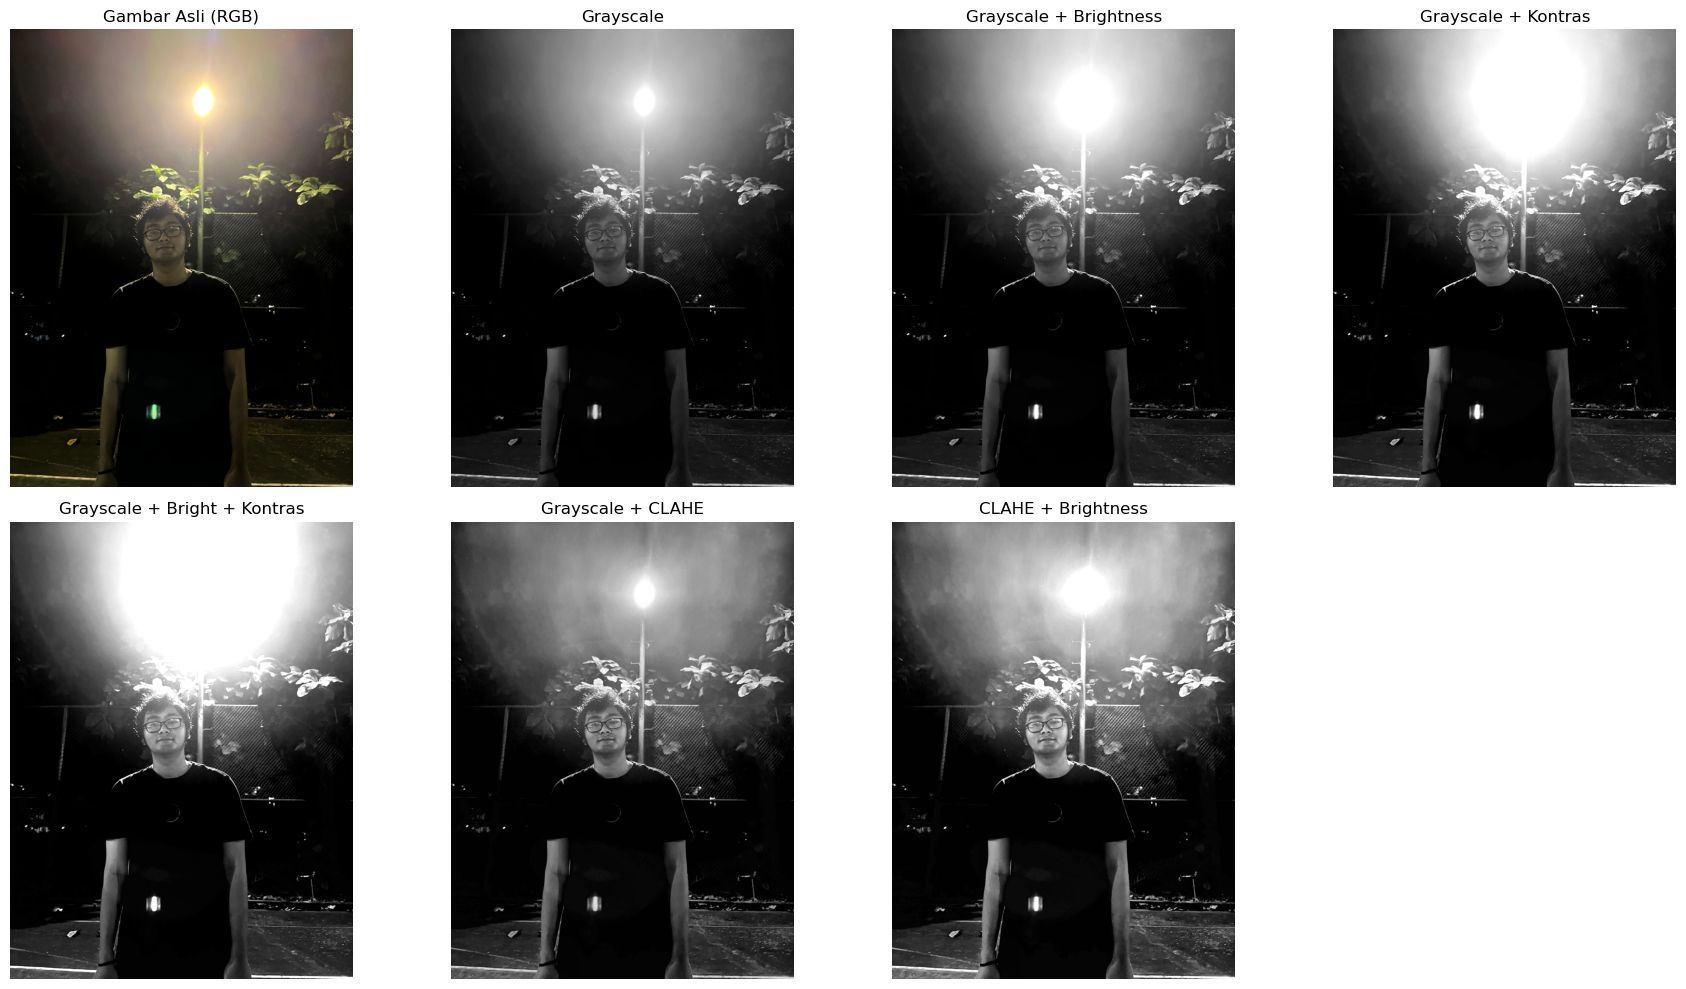

In [11]:
plt.figure(figsize=(18, 10))

titles = [
    "Gambar Asli (RGB)",
    "Grayscale",
    "Grayscale + Brightness",
    "Grayscale + Kontras",
    "Grayscale + Bright + Kontras",
    "Grayscale + CLAHE",
    "CLAHE + Brightness"
]

images = [img_rgb, img_gray, bright_gray, contrast_gray, bright_contrast_gray, clahe_img, clahe_bright]
cmaps = [None, 'gray', 'gray', 'gray', 'gray', 'gray', 'gray']

for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## Histogram Tiap Versi Grayscale

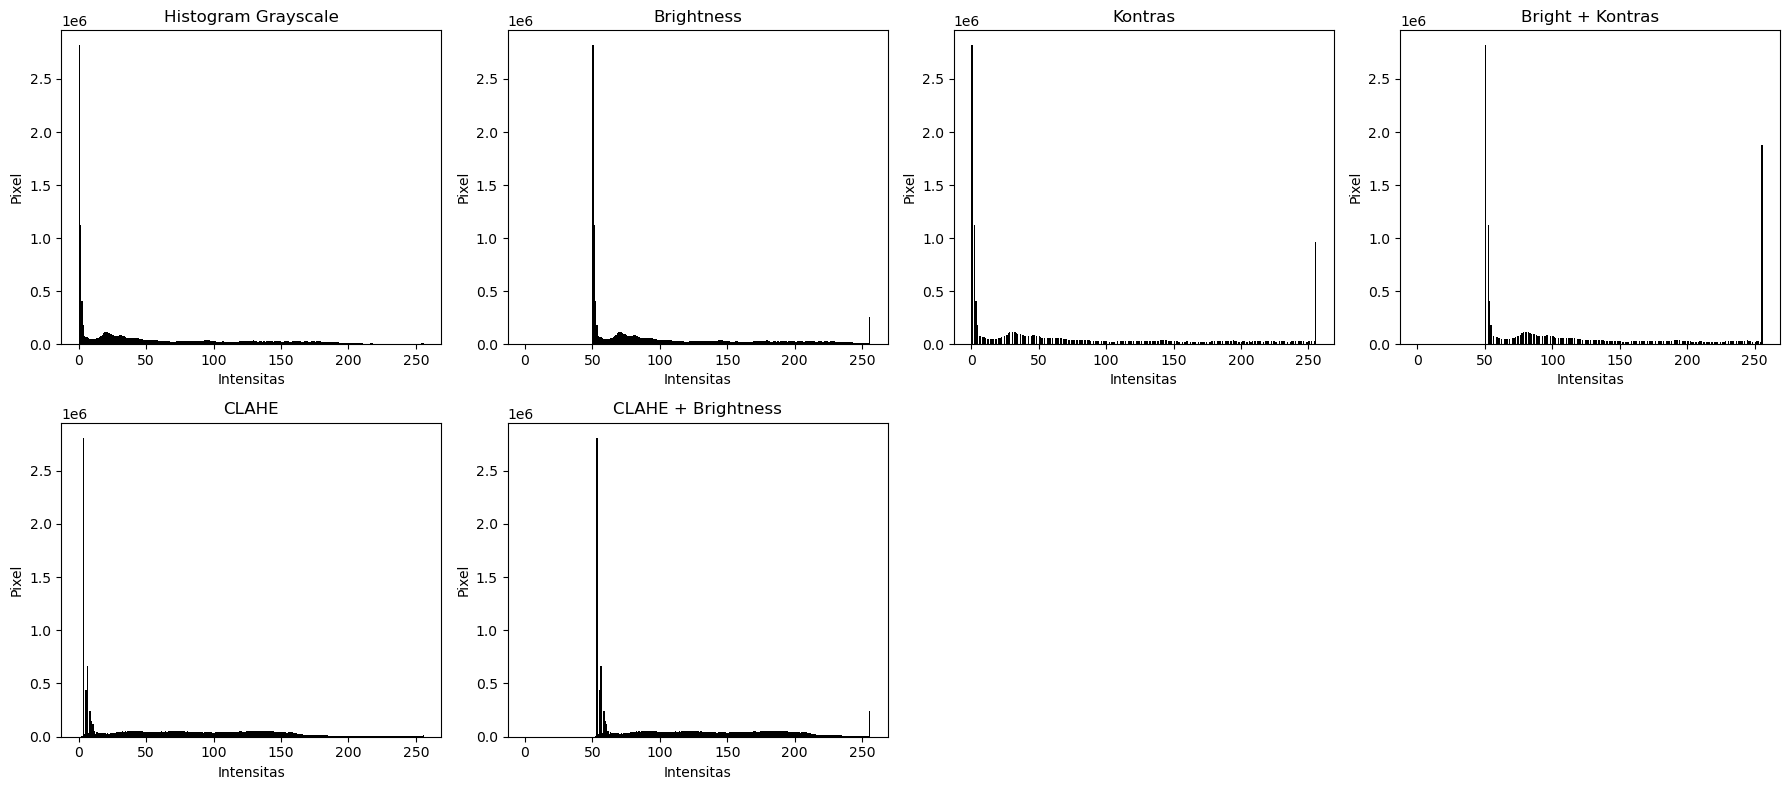

In [12]:
def plot_hist(image, title, index):
    plt.subplot(2, 4, index)
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(title)
    plt.xlabel("Intensitas")
    plt.ylabel("Pixel")

# Plot semua histogram
plt.figure(figsize=(18, 8))

hist_titles = [
    "Histogram Grayscale",
    "Brightness",
    "Kontras",
    "Bright + Kontras",
    "CLAHE",
    "CLAHE + Brightness"
]

# img_gray sudah di posisi ke-1
hist_images = [img_gray, bright_gray, contrast_gray, bright_contrast_gray, clahe_img, clahe_bright]

for i in range(6):
    plot_hist(hist_images[i], hist_titles[i], i+1)

plt.tight_layout()
plt.show()